In [8]:
import pandas as pd

# Replace the path with the correct path to your file
file_path = r'C:\Users\Karan\707-group-project-KaranShah1\data\Gestational Diabetic Dat Set.xlsx'

# Load the dataset into a Pandas DataFrame
df = pd.read_excel(file_path)

# Display the first few rows of the dataset
print(df.head())


   Case Number  Age  No of Pregnancy  Gestation in previous Pregnancy  BMI  \
0            1   22                2                                1  NaN   
1            2   26                2                                1  NaN   
2            3   29                1                                0  NaN   
3            4   28                2                                1  NaN   
4            5   21                2                                1  NaN   

    HDL  Family History  unexplained prenetal loss  \
0  55.0               0                          0   
1  53.0               0                          0   
2  50.0               0                          0   
3  51.0               0                          0   
4  52.0               0                          0   

   Large Child or Birth Default  PCOS  Sys BP  Dia BP  OGTT  Hemoglobin  \
0                             0     0   102.0      69   NaN        12.0   
1                             0     0   101.0      63   

In [9]:
# Display the dimensions of the dataset
print(df.shape)


(3525, 17)


In [10]:
# Display basic information about the dataset
print(df.info())

# Display summary statistics for numerical columns
print(df.describe())

# Check for missing values
print(df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3525 entries, 0 to 3524
Data columns (total 17 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Case Number                      3525 non-null   int64  
 1   Age                              3525 non-null   int64  
 2   No of Pregnancy                  3525 non-null   int64  
 3   Gestation in previous Pregnancy  3525 non-null   int64  
 4   BMI                              2444 non-null   float64
 5   HDL                              2524 non-null   float64
 6   Family History                   3525 non-null   int64  
 7   unexplained prenetal loss        3525 non-null   int64  
 8   Large Child or Birth Default     3525 non-null   int64  
 9   PCOS                             3525 non-null   int64  
 10  Sys BP                           1820 non-null   float64
 11  Dia BP                           3525 non-null   int64  
 12  OGTT                

NameError: name 'plt' is not defined

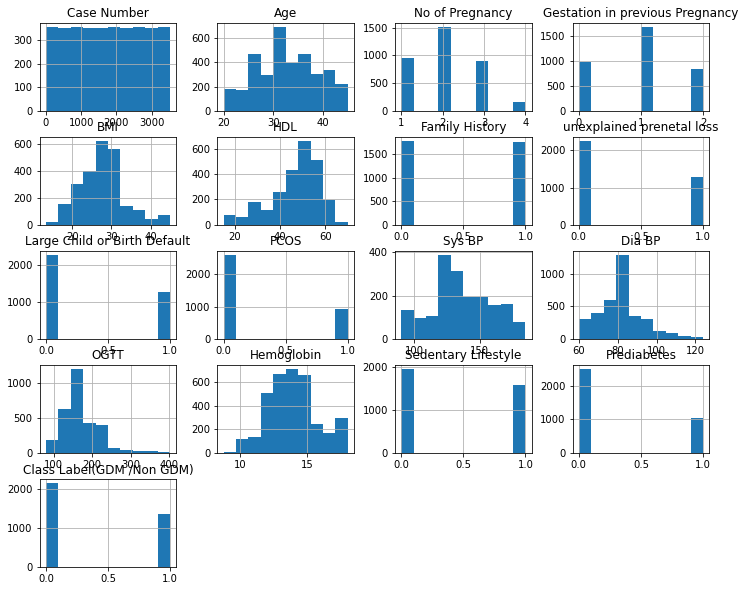

In [11]:
# Example: Plot histograms for numerical features
df.hist(figsize=(12, 10))
plt.show()


In [12]:
# Example: Identify and handle outliers using z-score
from scipy.stats import zscore

# Calculate z-scores for numerical columns
z_scores = zscore(df.select_dtypes(include=['float64']))

# Set a threshold for z-scores (e.g., 3)
outliers = (abs(z_scores) > 3).all(axis=1)

# Remove outliers
df_no_outliers = df[~outliers]

# Display what is done
print(f"Original DataFrame shape: {df.shape}")
print(f"DataFrame shape after removing outliers: {df_no_outliers.shape}")


Original DataFrame shape: (3525, 17)
DataFrame shape after removing outliers: (3525, 17)


In [13]:
#This could mean that either there were no outliers present in the data according to the specified z-score threshold, or the threshold used was not sufficient to identify outliers.

#It's worth investigating the distribution of z-scores or examining specific columns to gain more insights into the potential outliers. You might want to visualize the distribution of z-scores or inspect specific columns with high z-scores to understand which data points are being considered as outliers.

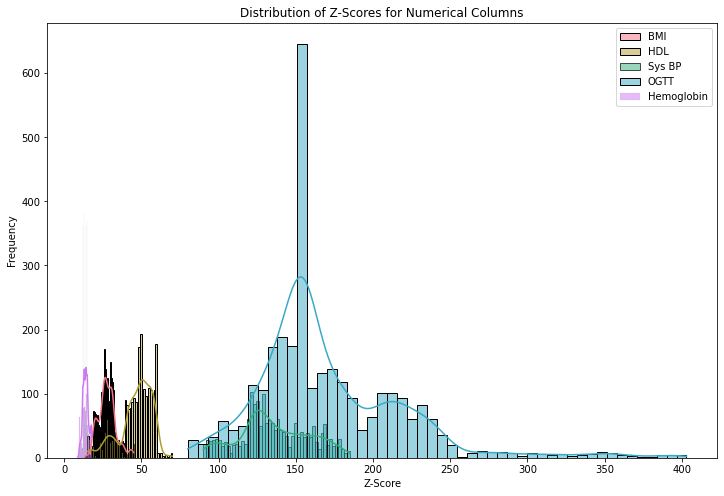

In [14]:
# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the distribution of z-scores for each numerical column with different color codes
plt.figure(figsize=(12, 8))
colors = sns.color_palette('husl', n_colors=len(df.select_dtypes(include=['float64']).columns))

for column, color in zip(df.select_dtypes(include=['float64']).columns, colors):
    sns.histplot(df[column].values, kde=True, label=column, bins=50, color=color)

plt.xlabel('Z-Score')
plt.ylabel('Frequency')
plt.title('Distribution of Z-Scores for Numerical Columns')
plt.legend()
plt.show()


In [ ]:
'''
The image shows that the distributions of z-scores for the five columns are all different. 
The distribution for BMI is approximately normal, with most of the data points clustered around the mean and a few outliers at the extremes. 
The distribution for HDL is also approximately normal, but with a longer tail on the right-hand side, indicating that there are more data points with high HDL levels than low HDL levels. 
The distribution for Sys BP is skewed to the right, with more data points with high blood pressure levels than low blood pressure levels. 
The distributions for OGTT and Hemoglobin are both multimodal, with multiple peaks indicating that there are subpopulations of individuals with different levels of these variables.

The image also shows that the z-scores for the different columns are not correlated. 
This means that individuals who have a high z-score for one column are not more or less likely to have a high z-score for another column. 
For example, an individual with a high BMI z-score is not more or less likely to have a high HDL z-score.

Overall, the image shows that the five numerical columns have different distributions and are not correlated. 
This information can be used to develop statistical models to predict the values of one column based on the values of the other columns.
'''


In [15]:
import pandas as pd

# Create a DataFrame with z-scores for each numerical column
z_scores_df = pd.DataFrame(z_scores, columns=df.select_dtypes(include=['float64']).columns)

# Display the z-scores DataFrame
print("Z-Scores for Numerical Columns:")
print(z_scores_df)


Z-Scores for Numerical Columns:
      BMI  HDL  Sys BP  OGTT  Hemoglobin
0     NaN  NaN     NaN   NaN   -1.051562
1     NaN  NaN     NaN   NaN   -0.836936
2     NaN  NaN     NaN   NaN    0.182539
3     NaN  NaN     NaN   NaN    0.558135
4     NaN  NaN     NaN   NaN    0.558135
...   ...  ...     ...   ...         ...
3520  NaN  NaN     NaN   NaN   -0.300370
3521  NaN  NaN     NaN   NaN    0.128882
3522  NaN  NaN     NaN   NaN    0.719105
3523  NaN  NaN     NaN   NaN   -0.354027
3524  NaN  NaN     NaN   NaN    0.987388

[3525 rows x 5 columns]


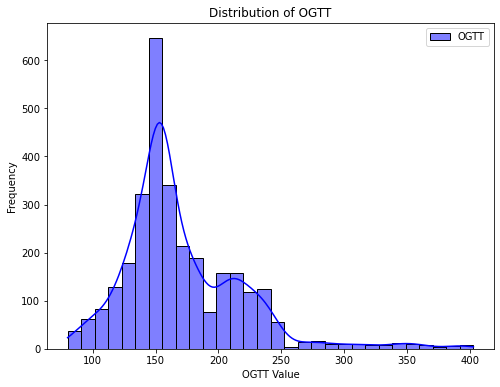

KeyError: "None of [Index(['non_norm_var1', 'non_norm_var2', 'non_norm_var3'], dtype='object')] are in the [columns]"

In [16]:
# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Assume 'OGTT' is the normally distributed variable
# Identify outliers using Z-scores
z_scores_ogtt = zscore(df['OGTT'])
outliers_ogtt = (abs(z_scores_ogtt) > 3)

# Visualize the distribution of OGTT
plt.figure(figsize=(8, 6))
sns.histplot(df['OGTT'], kde=True, bins=30, color='blue', label='OGTT')
plt.xlabel('OGTT Value')
plt.ylabel('Frequency')
plt.title('Distribution of OGTT')
plt.legend()
plt.show()

# Perform log transformation on non-normally distributed variables
non_norm_vars = ['non_norm_var1', 'non_norm_var2', 'non_norm_var3']  # Replace with actual variable names
df[non_norm_vars] = np.log1p(df[non_norm_vars])


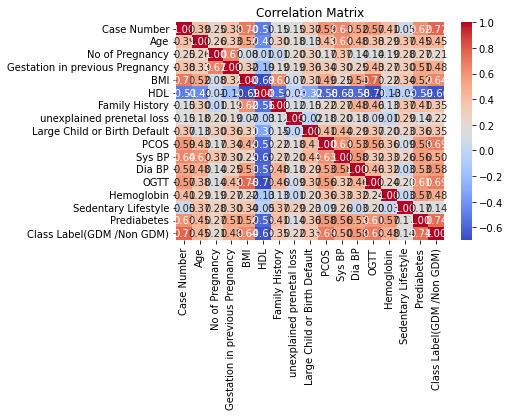

ValueError: Could not interpret value `Class Label(GDM / Non GDM)` for parameter `hue`

<Figure size 576x432 with 0 Axes>

In [17]:

# Step 2: Correlation Analysis
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# Step 3: Visualizing Relationships
# Example: Visualize the relationship between 'Age' and 'OGTT'
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Age', y='OGTT', data=df, hue='Class Label(GDM / Non GDM)')
plt.title('Scatter Plot of Age vs OGTT')
plt.show()



In [21]:
# Create new feature(s) if relevant
# For example, BMI category based on World Health Organization (WHO) classification
df['BMI_Category'] = pd.cut(df['BMI'], bins=[0, 18.5, 24.9, 29.9, 100], labels=['Underweight', 'Normal', 'Overweight', 'Obese'])


In [22]:
# Create new feature(s) if relevant
# For example, BMI category based on World Health Organization (WHO) classification
df['BMI_Category'] = pd.cut(df['BMI'], bins=[0, 18.5, 24.9, 29.9, 100], labels=['Underweight', 'Normal', 'Overweight', 'Obese'])


In [23]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Split the data into features (X) and target variable (y)
X = df.drop(columns=['Class Label(GDM / Non GDM)'])
y = df['Class Label(GDM / Non GDM)']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train a RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred))


KeyError: "['Class Label(GDM / Non GDM)'] not found in axis"

In [25]:
# Split the data into features (X) and target variable (y)
X = df.drop(columns=['Class Label(GDM /Non GDM)'])
y = df['Class Label(GDM /Non GDM)']


In [28]:
# Perform one-hot encoding on categorical variables
df_encoded = pd.get_dummies(df, columns=['BMI_Category'], drop_first=True)


In [29]:
# Split the data into features (X) and target variable (y)
X = df_encoded.drop(columns=['Class Label(GDM /Non GDM)'])
y = df_encoded['Class Label(GDM /Non GDM)']

# Continue with the model-building steps


In [36]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [37]:
from sklearn.ensemble import RandomForestClassifier

# Create a RandomForestClassifier (or choose another classifier)
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [39]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nAccuracy:", accuracy_score(y_test, y_pred))

Confusion Matrix:
 [[438  10]
 [ 11 246]]

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98       448
           1       0.96      0.96      0.96       257

    accuracy                           0.97       705
   macro avg       0.97      0.97      0.97       705
weighted avg       0.97      0.97      0.97       705


Accuracy: 0.9702127659574468


In [41]:
feature_importance = model.feature_importances_
features = X.columns
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print(feature_importance_df)


                            Feature  Importance
0                       Case Number    0.337767
12                             OGTT    0.159452
4                               BMI    0.110340
11                           Dia BP    0.101649
15                      Prediabetes    0.079768
9                              PCOS    0.055980
5                               HDL    0.028347
10                           Sys BP    0.026989
18               BMI_Category_Obese    0.023413
13                       Hemoglobin    0.022420
3   Gestation in previous Pregnancy    0.021547
1                               Age    0.014438
16              BMI_Category_Normal    0.003759
2                   No of Pregnancy    0.003591
6                    Family History    0.003324
8      Large Child or Birth Default    0.002039
14              Sedentary Lifestyle    0.001837
17          BMI_Category_Overweight    0.001783
7         unexplained prenetal loss    0.001557


In [40]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nAccuracy:", accuracy_score(y_test, y_pred))

Confusion Matrix:
 [[438  10]
 [ 11 246]]

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98       448
           1       0.96      0.96      0.96       257

    accuracy                           0.97       705
   macro avg       0.97      0.97      0.97       705
weighted avg       0.97      0.97      0.97       705


Accuracy: 0.9702127659574468


In [43]:
pip install tensorflow scikit-learn


  Using cached tensorflow-2.15.0-cp39-cp39-win_amd64.whl (2.1 kB)



In [45]:
X = df_encoded.drop(columns=['Class Label(GDM /Non GDM)'])
y = df_encoded['Class Label(GDM /Non GDM)']


In [46]:
# Example of one-hot encoding using pandas get_dummies
X_encoded = pd.get_dummies(X)


In [47]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)


In [48]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [49]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential([
    Dense(units=hidden_layer1_size, activation='relu', input_dim=input_size),
    Dense(units=hidden_layer2_size, activation='relu'),
    Dense(units=output_size, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [56]:
# Assuming you initially had
input_size = 15
# Adjust it to
input_size = 17


In [62]:
# Assuming you have your data and labels loaded and preprocessed

# Split the data into features (X) and target variable (y)
X = df_encoded.drop(columns=['Class Label(GDM /Non GDM)'])
y = df_encoded['Class Label(GDM /Non GDM)']

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the number of training epochs
epochs = 10  # You can adjust this based on your experimentation

# Train your model on the training data
model.fit(X_train_scaled, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_test_scaled, y_test))

# Evaluate the model on the test data
loss, accuracy = model.evaluate(X_test_scaled, y_test)
print(f"Test Loss: {loss}, Test Accuracy: {accuracy}")

# Make predictions on new data
predictions = model.predict(X_test_scaled)


Epoch 1/10


ValueError: in user code:

    File "c:\Users\Karan\anaconda3\lib\site-packages\keras\src\engine\training.py", line 1401, in train_function  *
        return step_function(self, iterator)
    File "c:\Users\Karan\anaconda3\lib\site-packages\keras\src\engine\training.py", line 1384, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\Karan\anaconda3\lib\site-packages\keras\src\engine\training.py", line 1373, in run_step  **
        outputs = model.train_step(data)
    File "c:\Users\Karan\anaconda3\lib\site-packages\keras\src\engine\training.py", line 1150, in train_step
        y_pred = self(x, training=True)
    File "c:\Users\Karan\anaconda3\lib\site-packages\keras\src\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "c:\Users\Karan\anaconda3\lib\site-packages\keras\src\engine\input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential" is incompatible with the layer: expected shape=(None, 15), found shape=(None, 19)


In [63]:
# Check the number of features in training and testing data
print(f"Number of features in training data: {X_train_scaled.shape[1]}")
print(f"Number of features in testing data: {X_test_scaled.shape[1]}")


Number of features in training data: 19
Number of features in testing data: 19


In [64]:
# Define the sizes for your neural network layers
input_size = 19  # Update to match the actual number of features
hidden_layer1_size = 64
hidden_layer2_size = 32
output_size = 1

# Now you can use these variables to define your DSAE model
model = Sequential([
    Dense(units=hidden_layer1_size, activation='relu', input_dim=input_size),
    Dense(units=hidden_layer2_size, activation='relu'),
    Dense(units=output_size, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [65]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [66]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [67]:
# Use the scaled data for training
model.fit(X_train_scaled, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_test_scaled, y_test))


Epoch 1/10


89/89 [==============================] - 4s 12ms/step - loss: 0.3154 - accuracy: 0.8890 - val_loss: 0.1427 - val_accuracy: 0.9603
Epoch 2/10
89/89 [==============================] - 1s 6ms/step - loss: 0.0981 - accuracy: 0.9706 - val_loss: 0.0887 - val_accuracy: 0.9702
Epoch 3/10
89/89 [==============================] - 0s 5ms/step - loss: 0.0712 - accuracy: 0.9741 - val_loss: 0.0768 - val_accuracy: 0.9688
Epoch 4/10
89/89 [==============================] - 1s 10ms/step - loss: 0.0614 - accuracy: 0.9759 - val_loss: 0.0740 - val_accuracy: 0.9674
Epoch 5/10
89/89 [==============================] - 1s 8ms/step - loss: 0.0538 - accuracy: 0.9759 - val_loss: 0.0670 - val_accuracy: 0.9745
Epoch 6/10
89/89 [==============================] - 1s 8ms/step - loss: 0.0468 - accuracy: 0.9784 - val_loss: 0.0680 - val_accuracy: 0.9702
Epoch 7/10
89/89 [==============================] - 1s 6ms/step - loss: 0.0433 - accuracy: 0.9787 - val_loss: 0.0653 - val_accuracy: 0.9716
Epoch 8/10
89/89

In [68]:
# Evaluate the model on the test data
loss, accuracy = model.evaluate(X_test_scaled, y_test)
print(f"Test Loss: {loss}, Test Accuracy: {accuracy}")


23/23 [==============================] - 0s 6ms/step - loss: 0.0645 - accuracy: 0.9688
Test Loss: 0.06452150642871857, Test Accuracy: 0.9687943458557129


In [69]:
# Use the trained model to make predictions
predictions = model.predict(X_test_scaled)


23/23 [==============================] - 0s 5ms/step


In [70]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Assuming 'predictions' contains the predicted labels
accuracy = accuracy_score(y_test, predictions.round())
print(f"Accuracy: {accuracy}")

print("Confusion Matrix:")
print(confusion_matrix(y_test, predictions.round()))

print("Classification Report:")
print(classification_report(y_test, predictions.round()))


Accuracy: 0.9687943262411347
Confusion Matrix:
[[437  11]
 [ 11 246]]
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       448
           1       0.96      0.96      0.96       257

    accuracy                           0.97       705
   macro avg       0.97      0.97      0.97       705
weighted avg       0.97      0.97      0.97       705



In [72]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

# Assuming X is your feature matrix
X_scaled = StandardScaler().fit_transform(X)

# Create and fit the DBSCAN model
dbscan = DBSCAN(eps=0.5, min_samples=5)
labels = dbscan.fit_predict(X_scaled)

# Visualize the clusters or noise
# (For a scatter plot, assuming X has two features)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, cmap='viridis')
plt.title('DBSCAN Clusters')
plt.show()


AttributeError: 'NoneType' object has no attribute 'split'

In [1]:
# Import necessary libraries
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load the dataset into a Pandas DataFrame
file_path = r'C:\Users\Karan\707-group-project-KaranShah1\data\Gestational Diabetic Dat Set.xlsx'
df = pd.read_excel(file_path)

# Handle missing values using SimpleImputer
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(df.drop(columns=['Class Label(GDM /Non GDM)']))
y = df['Class Label(GDM /Non GDM)']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train a RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred))




Accuracy: 0.9659574468085106
              precision    recall  f1-score   support

           0       0.98      0.97      0.97       448
           1       0.94      0.96      0.95       257

    accuracy                           0.97       705
   macro avg       0.96      0.97      0.96       705
weighted avg       0.97      0.97      0.97       705

